# Data exploration

Two datasets available from kaggle: https://www.kaggle.com/zynicide/wine-reviews

- winemag-data_first150k.csv
- winemag-data-130k-v2.csv

### Import libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## Dataset wines1: winemag-data_first150k.csv

In [39]:
wines1 = pd.read_csv("../data/winemag-data_first150k.csv", index_col=0)
wines1

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude
...,...,...,...,...,...,...,...,...,...,...
150925,Italy,Many people feel Fiano represents southern Ita...,NaN,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio
150926,France,"Offers an intriguing nose with ginger, lime an...",Cuvée Prestige,91,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain
150927,Italy,This classic example comes from a cru vineyard...,Terre di Dora,91,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora
150928,France,"A perfect salmon shade, with scents of peaches...",Grand Brut Rosé,90,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset


In [40]:
wines1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150930 entries, 0 to 150929
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   country      150925 non-null  object 
 1   description  150930 non-null  object 
 2   designation  105195 non-null  object 
 3   points       150930 non-null  int64  
 4   price        137235 non-null  float64
 5   province     150925 non-null  object 
 6   region_1     125870 non-null  object 
 7   region_2     60953 non-null   object 
 8   variety      150930 non-null  object 
 9   winery       150930 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 12.7+ MB


<font color=blue>10 columns:
- 2 numerical
- 8 object type

Some values missing on designation (45 000), price (13 000), region_1 and region_2</font>

## Dataset wines2: winemag-data-130k-v2.csv

In [41]:
wines2 = pd.read_csv("../data/winemag-data-130k-v2.csv", index_col=0)
wines2

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
129966,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [42]:
wines2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129971 entries, 0 to 129970
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                129908 non-null  object 
 1   description            129971 non-null  object 
 2   designation            92506 non-null   object 
 3   points                 129971 non-null  int64  
 4   price                  120975 non-null  float64
 5   province               129908 non-null  object 
 6   region_1               108724 non-null  object 
 7   region_2               50511 non-null   object 
 8   taster_name            103727 non-null  object 
 9   taster_twitter_handle  98758 non-null   object 
 10  title                  129971 non-null  object 
 11  variety                129970 non-null  object 
 12  winery                 129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 13.9+ MB


<font color=blue>13 columns:
- 2 numericals
- 11 object type
    
The columns are the same as the dataset wines1 plus 3 additional columns:
- taster_name
- taster_twitter_handle
- title
    
Missing values on designation, region_1, region_2, taster_name and taster_twitter_handle</font>

<font color=blue>**=> concatenation of the two datasets wines1 and wines2 for common data exploration**</font>

## Concatenation of the two datasets

In [43]:
wines = pd.concat([wines1, wines2], axis=0, ignore_index=True)
wines

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,NaN,NaN,NaN
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,NaN,NaN,NaN
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,NaN,NaN,NaN
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,NaN,NaN,NaN
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
280896,Germany,Notes of honeysuckle and cantaloupe sweeten th...,Brauneberger Juffer-Sonnenuhr Spätlese,90,28.0,Mosel,NaN,NaN,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),Anna Lee C. Iijima,NaN,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897,US,Citation is given as much as a decade of bottl...,NaN,90,75.0,Oregon,Oregon,Oregon Other,Pinot Noir,Citation,Paul Gregutt,@paulgwine,Citation 2004 Pinot Noir (Oregon)
280898,France,Well-drained gravel soil gives this wine its c...,Kritt,90,30.0,Alsace,Alsace,NaN,Gewürztraminer,Domaine Gresser,Roger Voss,@vossroger,Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899,France,"A dry style of Pinot Gris, this is crisp with ...",NaN,90,32.0,Alsace,Alsace,NaN,Pinot Gris,Domaine Marcel Deiss,Roger Voss,@vossroger,Domaine Marcel Deiss 2012 Pinot Gris (Alsace)


In [44]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280901 entries, 0 to 280900
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   country                280833 non-null  object 
 1   description            280901 non-null  object 
 2   designation            197701 non-null  object 
 3   points                 280901 non-null  int64  
 4   price                  258210 non-null  float64
 5   province               280833 non-null  object 
 6   region_1               234594 non-null  object 
 7   region_2               111464 non-null  object 
 8   variety                280900 non-null  object 
 9   winery                 280901 non-null  object 
 10  taster_name            103727 non-null  object 
 11  taster_twitter_handle  98758 non-null   object 
 12  title                  129971 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 27.9+ MB


<font color=blue>concatenation OK, NaN automatically added on the 3 columns missing in wines1</font>

### Numerical variables

<font color=blue>The 2 numerical variables are points and price. </font>

In [45]:
wines.describe()

,points,price
count,280901.000000,258210.000000
mean,88.146934,34.177162
std,3.151528,38.611708
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,3300.000000


<font color=blue> 
- points range from 80 to 100
- price ranges from 4 to 3,300 (check currency)</font>

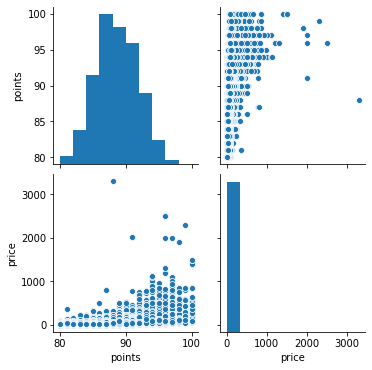

In [46]:
sns.pairplot(wines)
plt.show()

<font color=blue>No apparent correlation between points and price</font>

#### Points

<font color=blue>**Kaggle description for points:** the number of points WineEnthusiast rated the wine on a scale of 1-100 (though they say they only post reviews for wines that score &gt;=80)</font>

In [47]:
wines.points.describe()

count    280901.000000
mean         88.146934
std           3.151528
min          80.000000
25%          86.000000
50%          88.000000
75%          90.000000
max         100.000000
Name: points, dtype: float64

<font color=blue>dtype is float, change dtype to integer

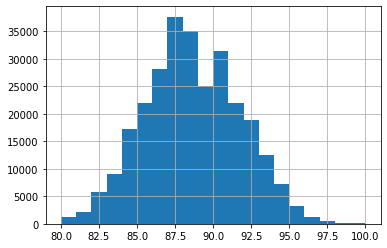

In [49]:
wines['points'].hist(bins=20)
plt.show()

<font color=blue> 
- Normal distribution of the points
- No NaNs</font>

#### Price

<font color=blue> Kaggle description:
- price: The cost for a bottle of the wine
</font>

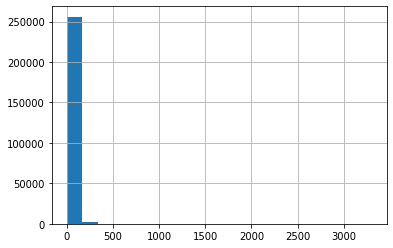

In [50]:
wines.price.hist(bins=20)
plt.show()

<font color=blue> 
- Currency unknown
- maybe analyze by range of price, most wines fall below 500</font>

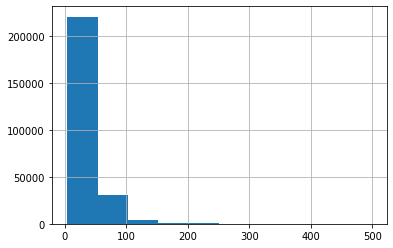

In [51]:
wines_low = wines[wines["price"]<500]
wines_low["price"].hist()
plt.show()

<font color=blue>More than 90% of the wine have price below than 100. Maybe use categories of prices (low, medium, high)</font>

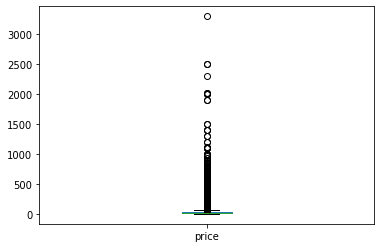

In [61]:
wines.price.plot.box()
plt.show()

<font color=blue>Box plot confirms ourliers in terms of price.</font>

### Categorical variables

#### Country

<font color=blue>Kaggle column description: The country that the wine is from</font>

In [62]:
wines.country.value_counts()

US                        116901
France                     43191
Italy                      43018
Spain                      14913
Portugal                   11013
Chile                      10288
Argentina                   9431
Australia                   7286
Austria                     6402
New Zealand                 4739
Germany                     4617
South Africa                3659
Greece                      1350
Israel                      1135
Canada                       453
Hungary                      377
Romania                      259
Bulgaria                     218
Uruguay                      201
Slovenia                     181
Croatia                      162
Turkey                       142
Mexico                       133
Moldova                      130
Georgia                      129
England                       83
Brazil                        77
Lebanon                       72
Cyprus                        42
Morocco                       40
Macedonia 

In [63]:
len(wines.country.value_counts())

50

<font color=blue>nº countries = 50</font>

#### Description

<font color=blue>Kaggle column description: A few sentences from a sommelier describing the wine's taste, smell, look, feel, etc.</font>

In [65]:
wines.description.describe(include=all)

count                                                280901
unique                                               169430
top       A little bit funky and unsettled when you pop ...
freq                                                      7
Name: description, dtype: object

<font color=blue>Maybe look for the words most repeated in *description*

#### Province

<font color=blue>Kaggle column description: The province or state that the wine is from</font>

In [64]:
wines.groupby("country")["province"].value_counts().to_frame()

province
country   province                  
Albania   Mirditë                  2
Argentina Mendoza Province      8006
          Other                 1425
Armenia   Armenia                  2
Australia South Australia       4353
...                              ...
Uruguay   Progreso                16
          Montevideo              14
          Atlantida                9
          Colonia                  6
          El Colorado              3

[490 rows x 1 columns]

<font color=blue>490 provinces, best to focus on countries

#### Designation

<font color=blue>Kaggle column description: The vineyard within the winery where the grapes that made the wine are from

In [67]:
wines.designation

0                              Martha's Vineyard
1           Carodorum Selección Especial Reserva
2                  Special Selected Late Harvest
3                                        Reserve
4                                     La Brûlade
                           ...                  
280896    Brauneberger Juffer-Sonnenuhr Spätlese
280897                                       NaN
280898                                     Kritt
280899                                       NaN
280900             Lieu-dit Harth Cuvée Caroline
Name: designation, Length: 280901, dtype: object

In [66]:
wines.designation.describe(include=all)

count      197701
unique      47239
top       Reserve
freq         4761
Name: designation, dtype: object

<font color=blue> 
- Designation seems very general terms about the wine.
- Maybe try to correlate with the name of the wine if NaN for the name.
- 1/3 are NaNs

#### region_1 & region_2

<font color=blue> Kaggle column description:
- region_1: The wine growing area in a province or state (ie Napa)
- region_2: Sometimes there are more specific regions specified within a wine growing area (ie Rutherford inside the Napa Valley), but this value can sometimes be blank

In [70]:
wines.region_1.describe(include=all)

count          234594
unique           1332
top       Napa Valley
freq            10689
Name: region_1, dtype: object

In [71]:
wines.region_2.describe(include=all)

count            111464
unique               18
top       Central Coast
freq              24122
Name: region_2, dtype: object

<font color=blue>Many NaNs for region two. Too many unique values for regions and besides those columns refer to a province. As we already discuss that country would be sufficient classification level for our study, the columns region will be dropped.

#### Variety

<font color=blue>Kaggle column description: The type of grapes used to make the wine (ie Pinot Noir) - *cépage/tipo de uva*

In [72]:
wines.variety.value_counts() 

Pinot Noir                  27563
Chardonnay                  26235
Cabernet Sauvignon          22272
Red Blend                   19008
Bordeaux-style Red Blend    14262
                            ...  
Diamond                         1
Albanello                       1
Trajadura                       1
Pinot Grigio-Chardonnay         1
Tempranillo-Tannat              1
Name: variety, Length: 756, dtype: int64

In [76]:
wines.variety.describe(include=all)

count         280900
unique           756
top       Pinot Noir
freq           27563
Name: variety, dtype: object

<font color=blue> 756 different varieties. Might be interesting to link it to the price and country.

In [77]:
wines[wines["variety"]=="Pinot Noir"].country.value_counts()

US              20225
France           4039
New Zealand      1407
Chile             693
Australia         322
Austria           229
Argentina         225
Germany           108
South Africa       60
Spain              44
Canada             41
Romania            33
Portugal           33
Bulgaria           20
Israel             20
Italy              14
Slovenia           14
Uruguay             8
England             7
Macedonia           4
Switzerland         3
Croatia             2
Brazil              2
Hungary             2
Moldova             2
Name: country, dtype: int64

In [78]:
wines[wines["variety"]=="Pinot Noir"].price.describe()

count    26415.000000
mean        45.751921
std         40.931922
min          5.000000
25%         27.000000
50%         40.000000
75%         55.000000
max       2500.000000
Name: price, dtype: float64

#### Winery

<font color=blue>Kaggle column description: The winery that made the wine

In [79]:
wines.winery.value_counts()

Williams Selyem                585
Testarossa                     492
DFJ Vinhos                     473
Chateau Ste. Michelle          419
Wines & Winemakers             391
                              ... 
Oakville Cross                   1
LeGrys                           1
Sueño                            1
Herdade do Monte da Ribeira      1
Pfeiffer                         1
Name: winery, Length: 19186, dtype: int64

In [80]:
wines.winery.describe(include=all)

count              280901
unique              19186
top       Williams Selyem
freq                  585
Name: winery, dtype: object

<font color=blue> No NaNs, many unique values. Maybe study can be performed looking at the winery rather than wine's name.

In [81]:
wines.groupby("winery")["points"].mean().sort_values(ascending=False)

winery
Sloan                    100.000000
Ovid                      97.000000
Gandona                   97.000000
Château Climens           96.692308
Araujo                    96.666667
                            ...    
Teillery                  80.000000
Moss Roxx                 80.000000
Marcus James              80.000000
Señorio de Aylés          80.000000
Generations of Sonoma     80.000000
Name: points, Length: 19186, dtype: float64

<font color=blue> if winery have one wine reviewed, points mean is biased !

#### taster_name

<font color=blue> no column description in Kaggle

In [82]:
wines.taster_name

0                        NaN
1                        NaN
2                        NaN
3                        NaN
4                        NaN
                 ...        
280896    Anna Lee C. Iijima
280897          Paul Gregutt
280898            Roger Voss
280899            Roger Voss
280900            Roger Voss
Name: taster_name, Length: 280901, dtype: object

In [83]:
wines.taster_name.describe(include=all)

count         103727
unique            19
top       Roger Voss
freq           25514
Name: taster_name, dtype: object

<font color=blue>19 unique tasters. Many NaNs as this column was not present in dataset wines1. Maybe drop this column.
    

#### taster_twitter_handle

<font color=blue> No column description in kaggle

In [84]:
wines.taster_twitter_handle

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
280896            NaN
280897    @paulgwine 
280898     @vossroger
280899     @vossroger
280900     @vossroger
Name: taster_twitter_handle, Length: 280901, dtype: object

In [85]:
wines.taster_twitter_handle.describe()

count          98758
unique            15
top       @vossroger
freq           25514
Name: taster_twitter_handle, dtype: object

In [86]:
wines.taster_twitter_handle.value_counts()

@vossroger          25514
@wineschach         15134
@kerinokeefe        10776
@vboone              9537
@paulgwine           9532
@mattkettmann        6332
@JoeCz               5147
@wawinereport        4966
@gordone_cellars     4177
@AnneInVino          3685
@laurbuzz            1835
@suskostrzewa        1085
@worldwineguys       1005
@bkfiona               27
@winewchristina         6
Name: taster_twitter_handle, dtype: int64

<font color=blue>Seems to be the twitter account of tasters. 4 tasters have no twitter account or are missing. Same as taster_name column with NaNs as this column does not exist in dataset wines1. Propose to drop this column.

#### title

<font color=blue>Kaggle column description: The title of the wine review, which often contains the vintage if you're interested in extracting that feature

In [88]:
wines.title

0                                                       NaN
1                                                       NaN
2                                                       NaN
3                                                       NaN
4                                                       NaN
                                ...                        
280896    Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...
280897                    Citation 2004 Pinot Noir (Oregon)
280898    Domaine Gresser 2013 Kritt Gewurztraminer (Als...
280899        Domaine Marcel Deiss 2012 Pinot Gris (Alsace)
280900    Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...
Name: title, Length: 280901, dtype: object

In [89]:
wines.title.describe()

count                                                129971
unique                                               118840
top       Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
freq                                                     11
Name: title, dtype: object

In [90]:
wines[wines["title"]=="Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma County)"]

,country,description,designation,points,price,province,region_1,region_2,variety,winery,taster_name,taster_twitter_handle,title
154139,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
155329,US,"Made predominantly from Pinot Noir, this is an...",Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
178703,US,A wonderfully drinkable sparkling wine that ap...,Sonoma Brut,90,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
214109,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
216514,US,"Made from mostly Pinot Noir grapes, with an ad...",Sonoma Brut,92,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
232493,US,This wine shows lots of finesse for the price....,Sonoma Brut,89,24.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
241619,US,"Creamy, lush and somewhat robust, this dry spa...",Sonoma Brut,90,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
245251,US,"A bit rough and scouring in texture, this tast...",Sonoma Brut,85,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
251668,US,"A good, dry and elegant bubbly. Shows crisp fl...",Sonoma Brut,89,20.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,NaN,NaN,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...
259931,US,From almost 92% Pinot Noir with the remainder ...,Sonoma Brut,88,22.0,California,Sonoma County,Sonoma,Sparkling Blend,Gloria Ferrer,Virginie Boone,@vboone,Gloria Ferrer NV Sonoma Brut Sparkling (Sonoma...


<font color=blue> Many NaNs but column can be usefull to extract the vintage of the wine. It looks like information from other columns are nested in the title such as variety, regions, province, etc

In [95]:
years=[]

for i in range(len(title)):
    if type(title[i])==str:
        years.append(re.findall(r"\d{4}", title[i]))

years

[['2013'],
 ['2011'],
 ['2013'],
 ['2013'],
 ['2012'],
 ['2011'],
 ['2013'],
 ['2012'],
 ['2013'],
 ['2012'],
 ['2011'],
 ['2012'],
 ['2012'],
 ['2012'],
 ['2012'],
 ['2013'],
 ['2010'],
 ['2011'],
 ['2010'],
 ['2012'],
 ['2012'],
 ['2013'],
 ['2007'],
 ['2011'],
 ['2009'],
 ['2011'],
 ['2013'],
 ['2013'],
 ['2011'],
 ['2010'],
 ['2012'],
 ['2010'],
 ['2011'],
 ['2010'],
 ['2011'],
 ['2010'],
 ['2011'],
 ['2010'],
 ['2011'],
 ['2011'],
 ['2011'],
 ['2009'],
 ['2012'],
 ['2011'],
 ['2011'],
 ['2010'],
 ['2011'],
 ['2011'],
 ['2011'],
 ['2011'],
 ['2008'],
 ['2008'],
 ['2010'],
 ['2011'],
 ['2010'],
 ['2010'],
 ['2010'],
 ['2011'],
 ['2011'],
 ['2014'],
 ['2013'],
 ['2015'],
 ['2014'],
 [],
 ['2015'],
 ['2015'],
 ['2015'],
 ['2013'],
 ['2014'],
 [],
 ['2014'],
 ['2013'],
 ['2013'],
 ['2013'],
 ['2012'],
 ['2013'],
 ['2015'],
 ['2016'],
 ['2015'],
 ['2014'],
 ['2014'],
 ['2014'],
 ['2016'],
 ['2016'],
 ['2014'],
 ['2015'],
 ['2016'],
 ['2014'],
 ['2014'],
 ['2015'],
 ['2014'],
 ['2015'],


<font color=blue>get year of each wine from "title" variable and append to new column

# Data cleaning

### Questions
- What makes a good wine ?
- Where is the most expensive wine from ?
- What is the country that export the most wines ?
- Consumption pattern of wine by country
- Tips to select a good wine ?

### Insights from data exploration

- Regions: eliminate Region1 and Region2
- drop taster_name & taster_twitter_handle
- Change point type to integers
- Create categories for wine price
- look for the words most repeated in description
- compare designation and title columns
- Extract vintage and other information from title to fill NaNs and create a new column vintage

In [48]:
wines["points"].astype(int)

0         96
1         96
2         96
3         96
4         95
          ..
280896    90
280897    90
280898    90
280899    90
280900    90
Name: points, Length: 280901, dtype: int64